# Le réchauffement climatique

![image](./AnoTempe.png)

Crédits : NOAA - NASA - UKMet / Traitement ONERC

On va tenter de répondre dans ce projet à une question : des mesures de température mesurées localement au cours du dernier siècle mettent-elles en évidence un réchauffement significatif ? On va travailler pour répondre à cette question sur les relevés de température enregistrés quotidiennement depuis juin 1920 à [la station météorologique de Montélimar](https://donneespubliques.meteofrance.fr/metadonnees_publiques/fiches/fiche_26198001.pdf). Elles peuvent être téléchargées librement depuis le [site de l'ECAD](https://www.ecad.eu/) (European Climate Assessment & Dataset).

Vous trouverez dans le fichier *montelimar_temperature.dat* un fichier de données préparées avec :
- colonne 1 : date en MJD (*modified Julian Day*)
- colonne 2 : température en degrés Celsius


La première problématique à laquelle vous êtes confrontés est de faire apparaître un effet faible et lent (on voit dans la figure ci-dessus que le réchauffement est de l'ordre de 1 °C sur les 30 dernières dernières années) à l'échelle des données (amplitudes de fluctuations quotidiennes ou saisonnières dix fois supérieures typiquement).

La seconde problématique est de montrer que l'effet observé est significatif, c'est-à-dire que cette augmentation des températures ne correspond pas à une fluctuation statistique. Pour cela on supposera que l'erreur sur les mesures de température est de l'ordre de 5 °C. C'est l'ordre de grandeur des fluctuations quotidiennes qui ne seront pas prises en compte dans un modèle qui décrit des variations saisonnières.

Les variations saisonnières de la température peuvent être modélisée par une sinusoïde de période une année. Il faut utiliser un modèle du type sinusoïdal :

$$ T(t) = A \sin{(\omega t + \phi)} + B $$

où les paramètres $A$ (amplitude), $\phi$ (phase) et $B$ (température moyenne) doivent être ajustés aux données, alors que $\omega = 2\pi/1\text{ an}$. Cependant, un tel modèle ajusté sur l'ensemble des données ne donnera aucune augmentation moyenne de la température. On pourra par exemple essayer d'appliquer un ajustement sinusoïdal pour chaque décennie, et voir si le paramètre $B$ (température moyenne) augmente. On peut aussi affiner ce modèle en se disant que l'accroissement lent de la température est linéaire. On pourra alors utiliser un modèle de type :

$$ T(t) = A \sin{(\omega t + \phi)} + B + C t $$

où $C$ est un nouveau paramètre à ajuster, qui correspond à l'accroissement linéaire lent de la température.

On gardera aussi en tête que l'ajustement par la fonction `curve_fit` permet de calculer assez facilement l'incertitude sur les paramètres de l'ajustement. Cela permettra de statuer sur le caractère significatif du réchauffement. On veillera alors à discuter les erreurs estimées sur les paramètres ajustés.

### <u>Première problématique<u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
a, b = np.loadtxt('montelimar_temperature.dat', unpack = True)
print(a)

[22553. 22554. 22555. ... 58846. 58847. 58848.]


Le début de la liste des dates est le 22553 MJD ce qui correspond au 20 janvier 1937 et la fin de cette liste est le 55848 qui correspond au 31 décembre 2019.

Text(0.5, 1.0, 'Evolution de la température en fonction du temps à Montélimar')

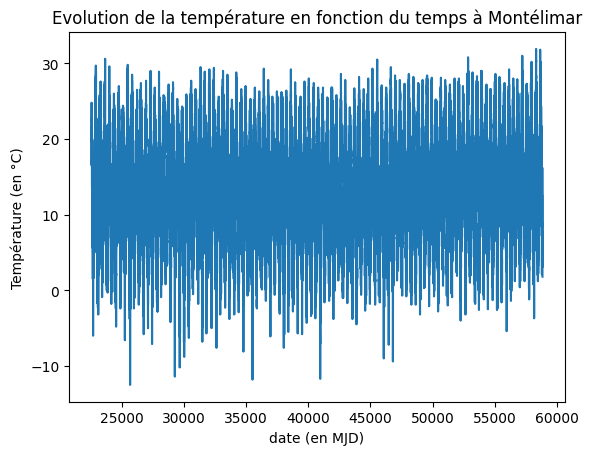

In [3]:
plt.plot(a, b)
plt.xlabel("date (en MJD)")
plt.ylabel("Température (en °C)")
plt.title("Evolution de la température en fonction du temps à Montélimar")

In [4]:
date_i = np.datetime64('1937-01-20')
date_f = np.datetime64('2019-12-31')

N = date_f - date_i
print (N)

30295 days


La durée de l'échantillon est de 30295 jours, soit 83 années or le réchauffement est de l'ordre de 1°C pour 30 ans.

In [5]:
2.77 / 30295

9.14342300709688e-05

Donc la température a augmenté de 2.77 °C durant l'échantillon de temps. Soit environ $1 * 10^-4$ °C par jour.

Nous avons donc un effet faible et lent du réchauffement climatique.

### <u> Deuxième problématique<u>

In [6]:
from scipy.optimize import curve_fit

In [8]:
def T(A, omega, phi, B, t):
    return A * np.sin(omega * t + phi) + B 